In [10]:
import os
import imageio.v2 as imageio
import torch

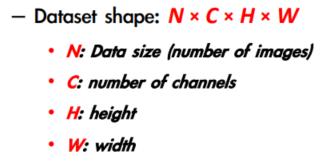

In [9]:
img_arr = imageio.imread(os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))
print(type(img_arr)) # <class 'numpy.ndarray'>
print(img_arr.shape) # (720, 1280, 3) 
print(img_arr.dtype) # uint8 : 0 ~ 255 (individual pixel)

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) # (H, W, C) -> (C, H, W)
print(out.shape) # torch.Size([3, 720, 1280])

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])


In [3]:
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames) # ['cat1.png', 'cat2.png', 'cat3.png']

from PIL import Image

for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  print(img_arr.shape) # (256, 256, 3)
  print(img_arr.dtype)
  print()

['cat1.png', 'cat2.png', 'cat3.png']
(256, 256, 3)
uint8

(256, 256, 3)
uint8

(256, 256, 3)
uint8



In [4]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) # (3, 3, 256, 256)

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename)) # Load image in numpy array
  img_t = torch.from_numpy(img_arr) # Transfer numpy array to Torch tensor 
  img_t = img_t.permute(2, 0, 1) # (3, 256, 256)
  batch[i] = img_t

print(batch.shape)

torch.Size([3, 3, 256, 256])


In [5]:
batch = batch.float()
batch /= 255.0
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1]

for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  print(mean, std)
  batch[:, c] = (batch[:, c] - mean) / std


torch.float32
torch.Size([3, 3, 256, 256])
tensor(0.5799) tensor(0.2212)
tensor(0.4493) tensor(0.2068)
tensor(0.3554) tensor(0.1931)
